# Project 1 -  Analysis on Chicago Crimes (2015,2016,2017)



The aim of this analysis is to visualize different crime trends , popular locations and time of the crimes in Chicago in 2015, 2016 and 2017

In [1]:
#Importing Libraries
from google.cloud import bigquery
from google.cloud.bigquery import Dataset
from google.cloud import storage
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.colors import Colormap
import seaborn as sns
sns.set(style="darkgrid")
from scipy import stats 
import calendar

In [2]:
key_path ='C:/ruchitaproject-3cc5d01e65a2.json'  

In [3]:
client = bigquery.Client.from_service_account_json(key_path)

In [4]:
client.project

'ruchitaproject'

In [5]:

client = bigquery.Client.from_service_account_json(key_path, project = 'bigquery-public-data')
print(client.project)

bigquery-public-data


In [6]:
dataset_id = 'chicago_crime'
dataset_ref = client.dataset(dataset_id, project = 'bigquery-public-data')

In [7]:
dataset_ref.path

'/projects/bigquery-public-data/datasets/chicago_crime'

In [8]:
# function for listing tables in a dataset:
def printTableList(client, dataset_id):
    project = client.project
    dataset_ref = client.dataset(dataset_id, project = project)    
    tables = list(client.list_tables(dataset_ref))
    if tables:
        print('Tables in dataset {}:'.format(dataset_id))
        for table in tables: 
            print('\t{}'.format(table.table_id))
        found = True
    else:
        print('{} dataset does not contain any tables.'.format(dataset_id))
        found = False
    return found

In [9]:
printTableList(client, dataset_id)


Tables in dataset chicago_crime:
	crime


True

In [10]:
table_id = 'crime'
table_ref = dataset_ref.table(table_id)

In [11]:
table_ref.table_id


'crime'

In [12]:
table = client.get_table(table_ref)  # API Request

In [13]:
type(table)


google.cloud.bigquery.table.Table

In [14]:
# function to print a table schema:
def printTableSchema(aTable):
    schemas = list(aTable.schema)
    if schemas:
        print('Table schema for {}:'.format(aTable.table_id))
        for aSchema in schemas:
            print('\t{0} {1}'.format(aSchema.name, aSchema.field_type))
        found = True
    else:
        found = False
    return found

In [15]:
printTableSchema(table)


Table schema for crime:
	unique_key INTEGER
	case_number STRING
	date TIMESTAMP
	block STRING
	iucr STRING
	primary_type STRING
	description STRING
	location_description STRING
	arrest BOOLEAN
	domestic BOOLEAN
	beat INTEGER
	district INTEGER
	ward INTEGER
	community_area INTEGER
	fbi_code STRING
	x_coordinate FLOAT
	y_coordinate FLOAT
	year INTEGER
	updated_on TIMESTAMP
	latitude FLOAT
	longitude FLOAT
	location STRING


True

In [16]:
sql = "SELECT * FROM `bigquery-public-data.chicago_crime.crime` WHERE year IN (2015,2016,2017)"
client = bigquery.Client.from_service_account_json(key_path, project = 'ruchitaproject') #<<< your BigQuery project ID here!
query_job = client.query(sql)

In [17]:
type(query_job)


google.cloud.bigquery.job.QueryJob

In [18]:
df = query_job.to_dataframe() # Creating a pandas dataframe from API data

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800181 entries, 0 to 800180
Data columns (total 22 columns):
unique_key              800181 non-null int64
case_number             800181 non-null object
date                    800181 non-null datetime64[ns, UTC]
block                   800181 non-null object
iucr                    800181 non-null object
primary_type            800181 non-null object
description             800181 non-null object
location_description    797864 non-null object
arrest                  800181 non-null bool
domestic                800181 non-null bool
beat                    800181 non-null int64
district                800180 non-null float64
ward                    800178 non-null float64
community_area          800181 non-null int64
fbi_code                800181 non-null object
x_coordinate            790127 non-null float64
y_coordinate            790127 non-null float64
year                    800181 non-null int64
updated_on              800181 non

In [21]:
df.head()

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,22637,HZ361128,2016-07-23 15:37:00+00:00,104XX S WENTWORTH AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,34.0,49,01A,1176803.0,1835516.0,2016,2016-07-30 15:49:37+00:00,41.703996,-87.628191,"(41.703995782, -87.628190772)"
1,22605,HZ338757,2016-07-06 22:33:00+00:00,003XX W 106TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,34.0,49,01A,1175896.0,1834634.0,2016,2016-07-13 15:50:12+00:00,41.701596,-87.631538,"(41.701595778, -87.631538348)"
2,22150,HY466381,2015-10-18 02:07:00+00:00,106XX S PRAIRIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,...,9.0,49,01A,1179795.0,1834569.0,2015,2015-10-25 15:55:25+00:00,41.701329,-87.617264,"(41.701329334, -87.61726351)"
3,23724,JA543618,2017-12-10 05:15:00+00:00,106XX S PERRY AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,34.0,49,01A,1177481.0,1834530.0,2017,2018-01-05 15:52:20+00:00,41.701275,-87.625738,"(41.701274797, -87.625737736)"
4,22962,HZ519714,2016-11-17 22:46:00+00:00,004XX E 107TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,9.0,49,01A,1181006.0,1834102.0,2016,2016-11-24 15:48:31+00:00,41.700020,-87.612844,"(41.700020108, -87.612843569)"


In [22]:
df['date'] = pd.to_datetime(df['date'], format = '%y/%m/%d: %I:%M:%S %p') # converting date format 

In [23]:
df['month'] = (df['date'].dt.month).apply(lambda x: calendar.month_abbr[x])
df['month'] = pd.Categorical(df['month'] , categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ordered=True)
#months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#df.head(10)

In [24]:
df['weekday'] = df['date'].dt.weekday_name
df['weekday'] = pd.Categorical(df['weekday'], categories = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'],ordered = True)
df.head(10)

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,month,weekday
0,22637,HZ361128,2016-07-23 15:37:00+00:00,104XX S WENTWORTH AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,01A,1176803.0,1835516.0,2016,2016-07-30 15:49:37+00:00,41.703996,-87.628191,"(41.703995782, -87.628190772)",Jul,Saturday
1,22605,HZ338757,2016-07-06 22:33:00+00:00,003XX W 106TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,01A,1175896.0,1834634.0,2016,2016-07-13 15:50:12+00:00,41.701596,-87.631538,"(41.701595778, -87.631538348)",Jul,Wednesday
2,22150,HY466381,2015-10-18 02:07:00+00:00,106XX S PRAIRIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,...,01A,1179795.0,1834569.0,2015,2015-10-25 15:55:25+00:00,41.701329,-87.617264,"(41.701329334, -87.61726351)",Oct,Sunday
3,23724,JA543618,2017-12-10 05:15:00+00:00,106XX S PERRY AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,01A,1177481.0,1834530.0,2017,2018-01-05 15:52:20+00:00,41.701275,-87.625738,"(41.701274797, -87.625737736)",Dec,Sunday
4,22962,HZ519714,2016-11-17 22:46:00+00:00,004XX E 107TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,01A,1181006.0,1834102.0,2016,2016-11-24 15:48:31+00:00,41.700020,-87.612844,"(41.700020108, -87.612843569)",Nov,Thursday
5,23028,HZ554936,2016-12-17 13:25:00+00:00,001XX W 105TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,...,01A,1177249.0,1835331.0,2016,2017-03-30 15:49:29+00:00,41.703478,-87.626563,"(41.703478083, -87.626563168)",Dec,Saturday
6,22714,HZ396660,2016-08-18 00:00:00+00:00,105XX S WENTWORTH AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PORCH,False,False,...,01A,1176814.0,1835095.0,2016,2016-08-25 15:50:02+00:00,41.702840,-87.628163,"(41.702840251, -87.628163116)",Aug,Thursday
7,23098,JA124638,2017-01-21 21:16:00+00:00,000XX W 104TH PL,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,False,...,01A,1177830.0,1835678.0,2017,2017-01-28 15:49:03+00:00,41.704417,-87.624425,"(41.704417195, -87.62442522)",Jan,Saturday
8,23026,HZ554936,2016-12-17 12:40:00+00:00,001XX W 105TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,...,01A,1177249.0,1835331.0,2016,2017-03-30 15:49:29+00:00,41.703478,-87.626563,"(41.703478083, -87.626563168)",Dec,Saturday
9,23635,JA465256,2017-10-10 01:43:00+00:00,002XX W 107TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,01A,1176443.0,1833983.0,2017,2017-10-17 15:53:24+00:00,41.699797,-87.629555,"(41.699797091, -87.629554895)",Oct,Tuesday


In [25]:
#df.to_csv('chicago_crime.csv', sep=',')

In [26]:
df.shape[0]

800181

In [27]:
#Dropping Non Criminal rows 
df1 = df[df.primary_type != 'NON - CRIMINAL']

In [28]:
df2 = df1[df.primary_type != 'NON-CRIMINAL']

C:\Users\rmanuja\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [29]:
crimedf = df2[df.primary_type != 'NON-CRIMINAL (SUBJECT SPECIFIED)']

C:\Users\rmanuja\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [30]:
crimedf.shape[0]

800050

In [31]:
crimedf.describe()

,unique_key,beat,district,ward,community_area,x_coordinate,y_coordinate,year,latitude,longitude
count,8.000500e+05,800050.000000,800049.000000,800047.000000,800050.000000,7.900020e+05,7.900020e+05,800050.000000,790002.000000,790002.000000
mean,1.056122e+07,1145.831183,11.229636,23.049893,37.010909,1.164620e+06,1.886180e+06,2016.004693,41.843273,-87.671419
std,6.397165e+05,693.615784,6.929057,13.961206,21.402733,1.630017e+04,3.120093e+04,0.814968,0.085808,0.059338
min,2.171400e+04,111.000000,1.000000,1.000000,0.000000,1.094231e+06,1.813897e+06,2015.000000,41.644590,-87.928909
25%,1.026317e+07,612.000000,6.000000,10.000000,23.000000,1.152854e+06,1.859105e+06,2015.000000,41.768757,-87.714148
50%,1.059765e+07,1024.000000,10.000000,24.000000,32.000000,1.166321e+06,1.893093e+06,2016.000000,41.862295,-87.665176
75%,1.091356e+07,1712.000000,17.000000,34.000000,55.000000,1.176405e+06,1.908802e+06,2017.000000,41.905531,-87.627910
max,1.144630e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951535e+06,2017.000000,42.022671,-87.524529


In [32]:
crimedf.primary_type.describe()

count     800050
unique        30
top        THEFT
freq      183238
Name: primary_type, dtype: object

In [33]:
crimedf.weekday.describe()

count     800050
unique         7
top       Friday
freq      120180
Name: weekday, dtype: object

In [34]:
crimedf.corr()

,unique_key,arrest,domestic,beat,district,ward,community_area,x_coordinate,y_coordinate,year,latitude,longitude
unique_key,1.000000,-0.057050,0.007914,0.007748,0.007800,0.018140,-0.024397,0.008048,0.022084,0.540566,0.022004,0.008457
arrest,-0.057050,1.000000,-0.036254,-0.026920,-0.027044,-0.017626,0.032204,-0.032417,-0.034031,-0.068693,-0.033829,-0.033202
domestic,0.007914,-0.036254,1.000000,-0.053889,-0.053885,-0.078030,0.091475,0.019117,-0.107794,0.000786,-0.107638,0.017586
beat,0.007748,-0.026920,-0.053889,1.000000,0.999694,0.671517,-0.487524,-0.552613,0.627117,0.000836,0.627952,-0.547700
district,0.007800,-0.027044,-0.053885,0.999694,1.000000,0.672809,-0.488083,-0.553451,0.628307,0.000829,0.629142,-0.548526
ward,0.018140,-0.017626,-0.078030,0.671517,0.672809,1.000000,-0.538930,-0.443005,0.657247,0.013391,0.657569,-0.436712
community_area,-0.024397,0.032204,0.091475,-0.487524,-0.488083,-0.538930,1.000000,0.248337,-0.778231,-0.019378,-0.777515,0.238708
x_coordinate,0.008048,-0.032417,0.019117,-0.552613,-0.553451,-0.443005,0.248337,1.000000,-0.550703,0.012144,-0.553443,0.999920
y_coordinate,0.022084,-0.034031,-0.107794,0.627117,0.628307,0.657247,-0.778231,-0.550703,1.000000,0.013920,0.999995,-0.540128
year,0.540566,-0.068693,0.000786,0.000836,0.000829,0.013391,-0.019378,0.012144,0.013920,1.000000,0.013844,0.012469


### Proportion of crime types that led to an arrest 

In [35]:
arrest = crimedf.groupby(['primary_type'])['arrest'].mean()
arrest

primary_type
ARSON                                0.101203
ASSAULT                              0.199695
BATTERY                              0.215123
BURGLARY                             0.049025
CONCEALED CARRY LICENSE VIOLATION    0.956835
CRIM SEXUAL ASSAULT                  0.084989
CRIMINAL DAMAGE                      0.059087
CRIMINAL TRESPASS                    0.621741
DECEPTIVE PRACTICE                   0.048924
GAMBLING                             1.000000
HOMICIDE                             0.295652
HUMAN TRAFFICKING                    0.125000
INTERFERENCE WITH PUBLIC OFFICER     0.951938
INTIMIDATION                         0.147059
KIDNAPPING                           0.075601
LIQUOR LAW VIOLATION                 0.997183
MOTOR VEHICLE THEFT                  0.091561
NARCOTICS                            0.999611
OBSCENITY                            0.779570
OFFENSE INVOLVING CHILDREN           0.146733
OTHER NARCOTIC VIOLATION             0.600000
OTHER OFFENSE        

### Proportion of crime types that were domestic

In [36]:
domestic = crimedf.groupby(['primary_type'])['domestic'].mean()
domestic

primary_type
ARSON                                0.041047
ASSAULT                              0.255578
BATTERY                              0.488735
BURGLARY                             0.010774
CONCEALED CARRY LICENSE VIOLATION    0.000000
CRIM SEXUAL ASSAULT                  0.151656
CRIMINAL DAMAGE                      0.109407
CRIMINAL TRESPASS                    0.047897
DECEPTIVE PRACTICE                   0.009406
GAMBLING                             0.000000
HOMICIDE                             0.055243
HUMAN TRAFFICKING                    0.093750
INTERFERENCE WITH PUBLIC OFFICER     0.006609
INTIMIDATION                         0.129902
KIDNAPPING                           0.314433
LIQUOR LAW VIOLATION                 0.001408
MOTOR VEHICLE THEFT                  0.010312
NARCOTICS                            0.000492
OBSCENITY                            0.236559
OFFENSE INVOLVING CHILDREN           0.498979
OTHER NARCOTIC VIOLATION             0.000000
OTHER OFFENSE        

### Top Crimes in Chicago in the year 2016, 2017 and 2018 

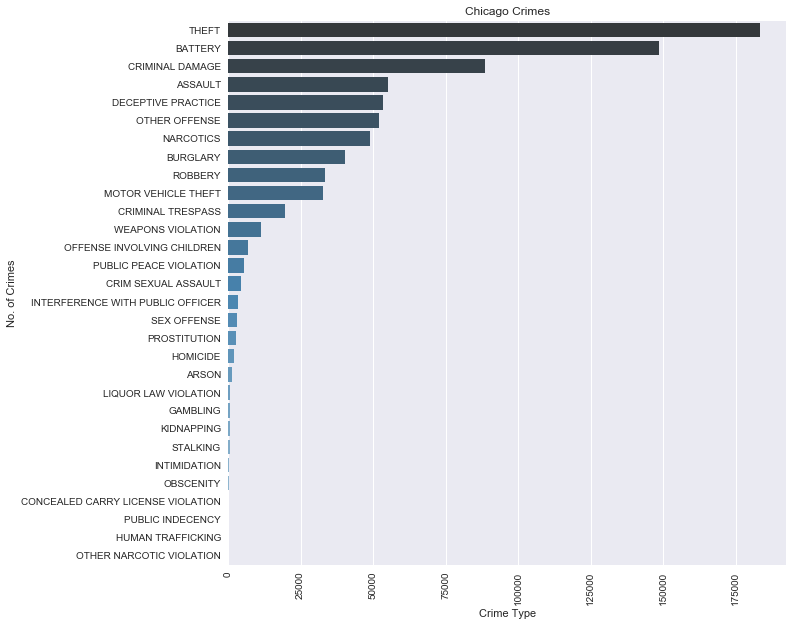

In [37]:
plt.figure(figsize=(10,10))
sns.countplot(y = 'primary_type', data = crimedf, order = crimedf['primary_type'].value_counts().index,palette="Blues_d")
plt.xticks(rotation = 'vertical')
plt.xlabel('Crime Type')
plt.ylabel('No. of Crimes')
plt.title ('Chicago Crimes')
plt.show()

# Hypothesis

1. Is there any significant change in the number of crimes over the 3 years  
2. Do more crimes tend to occur on a particular day of the week and month
3. Which crime led to most number of arrests 
4. Top 10 locations that are more prone to crimes
5. What time of the day most crimes occur 

# Overall 3 years Analysis 

## 1. Is there any significant change in the number of crimes over the 3 years ?

### Comparison on the number of crimes each each year 

In [38]:
crime_year = crimedf[['unique_key','year']].groupby(['year']).count()
crime_year = crime_year.reset_index(level=['year'])
crime_year = crime_year.rename(columns={"unique_key": "crime_count"})
crime_year

,year,crime_count
0,2015,263817
1,2016,268661
2,2017,267572


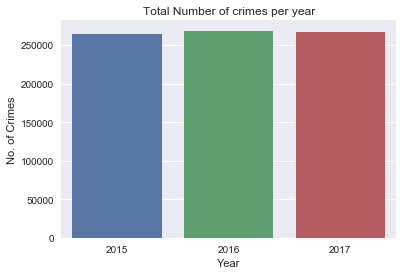

In [39]:
sns.countplot (x = 'year', data = crimedf)
plt.ylabel ('No. of Crimes')
plt.xlabel('Year')
plt.title('Total Number of crimes per year')
plt.show()

We can see that the total number of crimes across the three years is almost same. Thus there is no signicant change overall.

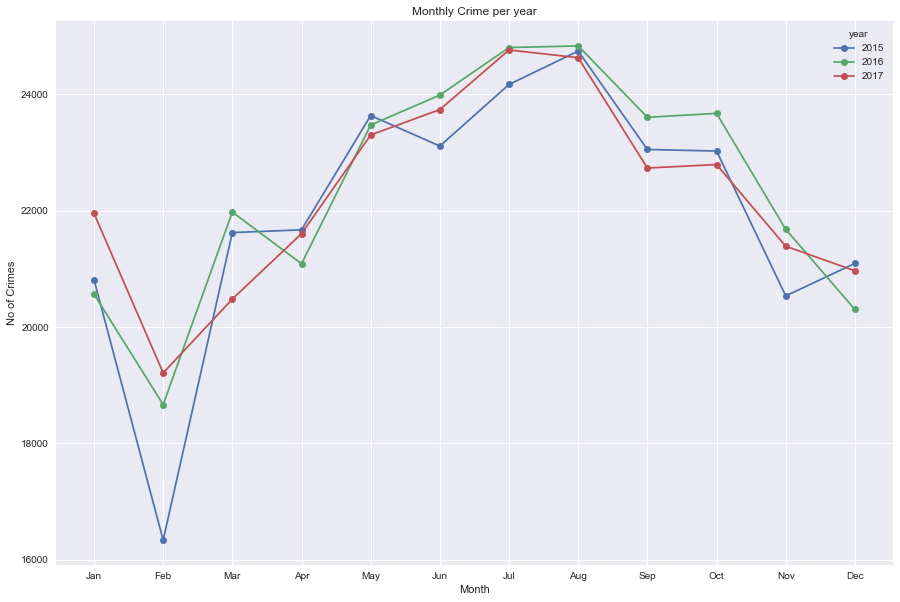

In [40]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
crimedf.groupby(['month','year'])['unique_key'].count().unstack().plot(marker='o',figsize = (15,10))
plt.xticks(np.arange(12),months)
plt.xlabel('Month')
plt.ylabel('No of Crimes')
plt.title('Monthly Crime per year')
plt.show()

Although, there is no significant change overall, we can see that number of crimes has increased in the Month of Feb significantly since 2015.

## 2. Do more crimes tend to occur on a particular day of the week and month?

### No of crimes recorded on days of the week

In [41]:
weekdaycrime = crimedf['weekday'].value_counts()
weekdaycrime

Friday       120180
Saturday     115886
Thursday     113956
Monday       113245
Sunday       112494
Tuesday      112234
Wednesday    112055
Name: weekday, dtype: int64

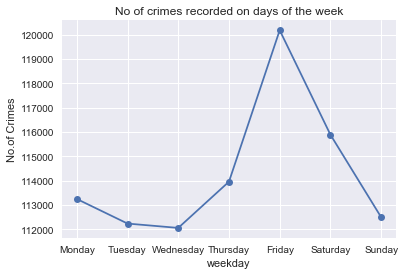

In [42]:
weekdays = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
crimedf.groupby('weekday')['unique_key'].count().plot(marker = 'o')
plt.xticks(np.arange(7),weekdays)
plt.ylabel('No.of Crimes')
plt.title('No of crimes recorded on days of the week')
plt.show()

We can see that most of the crimes occur on a Friday and Saturday

### No of crimes recorded per month

In [43]:
monthlycrime = crimedf['month'].value_counts()
monthlycrime

Aug    74210
Jul    73741
Jun    70840
May    70412
Oct    69494
Sep    69393
Apr    64364
Mar    64082
Nov    63603
Jan    63335
Dec    62363
Feb    54213
Name: month, dtype: int64

In [44]:
#Average number of Crimes each month 
monthlyavgcrime = crimedf['month'].value_counts().mean()
monthlyavgcrime

66670.83333333333

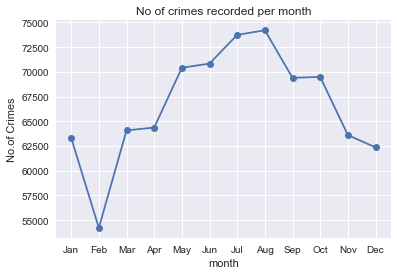

In [45]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
crimedf.groupby('month')['unique_key'].count().plot(marker = 'o')
plt.xticks(np.arange(12),months)
plt.ylabel('No.of Crimes')
plt.title('No of crimes recorded per month')
plt.show()

 We can see that most of crimes occur in the month of August

## 3.Which crime led to most number of arrests 

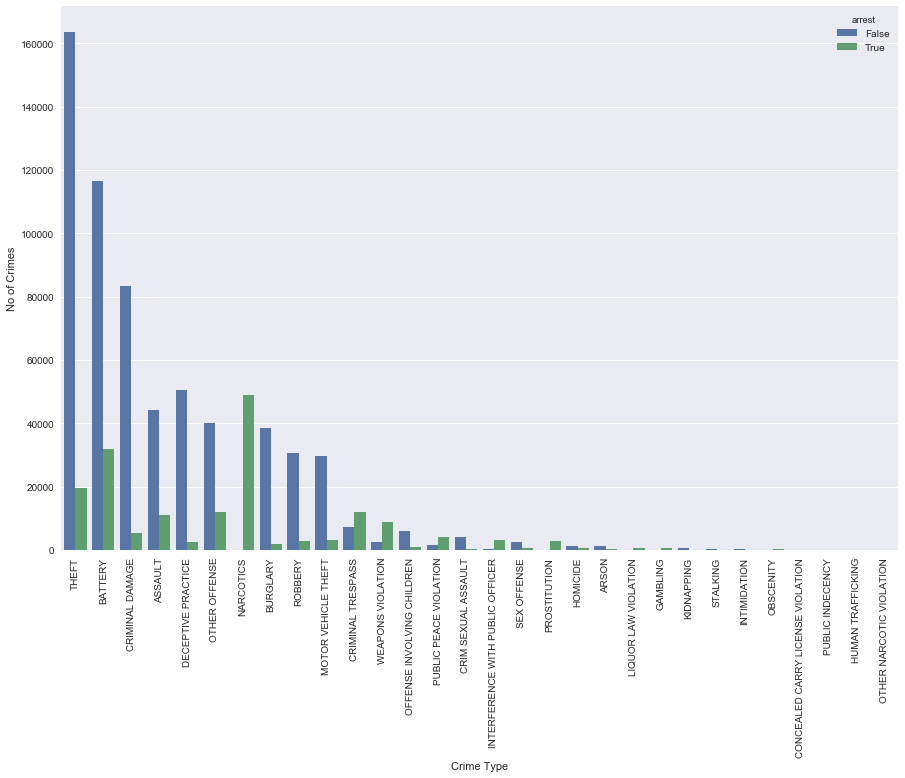

In [46]:
plt.figure(figsize=(15,10))
sns.countplot(x='primary_type',hue='arrest',data=crimedf,order=crimedf['primary_type'].value_counts().index)
plt.xticks(rotation='vertical')
plt.ylabel('No of Crimes')
plt.xlabel('Crime Type')
plt.show()

Although Theft has the most number of crimes majority of the theft crimes were not arrested. The most arrested crime is Narcotics

## 4. Top 10 locations that are more prone to crimes

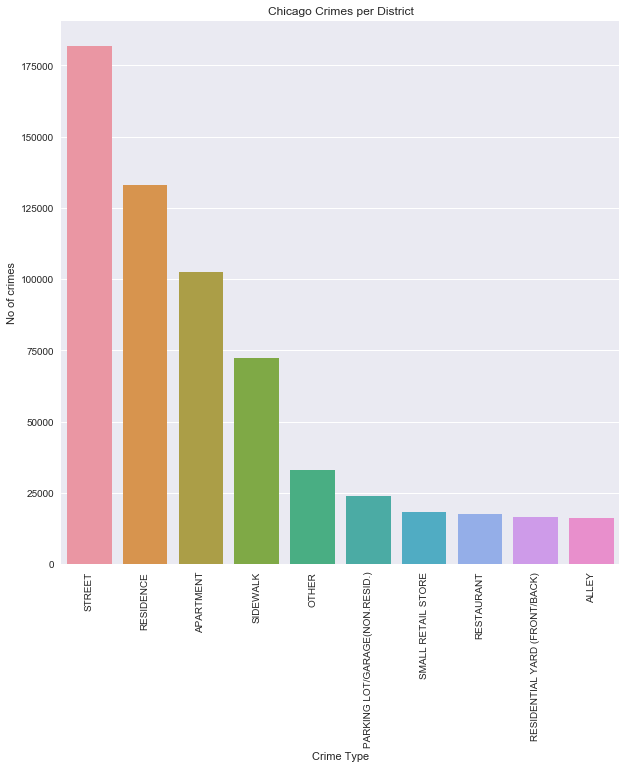

In [47]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'location_description', data = crimedf, order = crimedf['location_description'].value_counts().iloc[:10].index)
plt.xticks(rotation = 'vertical')
plt.xlabel('Crime Type')
plt.ylabel('No of crimes')
plt.title ('Chicago Crimes per District')
plt.show()

Most crimes tend to occur on the Street

## 5. What time of the day most crimes occur 

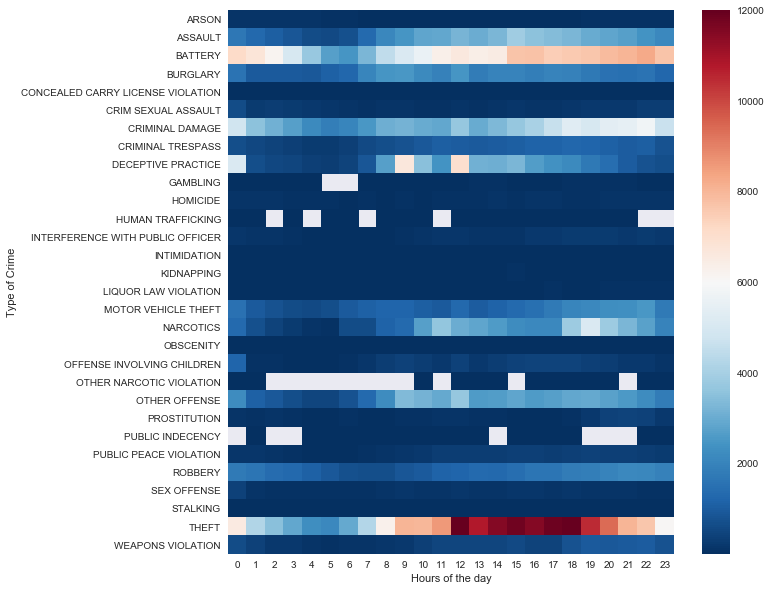

In [48]:
plt.figure(figsize=(10,10))
temp= crimedf.pivot_table(values='unique_key', index='primary_type',columns=crimedf['date'].dt.hour, aggfunc=np.size)
sns.heatmap(temp,cmap="RdBu_r",vmax=12000)
plt.xlabel('Hours of the day')
plt.ylabel('Type of Crime')
plt.show()

Most crimes occur around 12PM-8PM and most of them are Theft and Battery crimes.

## Overall Results

- Average Crime per month is approx. 66671
- Crimes mostly happened on a Friday & Saturday and they are minimum mid-week on Wednesdays & Tuesdays
- Crime frequency is Maximum in August and Minimum in February
- STREET is the most Crime prone area location in Chicago. 
- Most of the crimes tend to occur during the afternoon between 12PM - 8PM. 

# Individual Years Analysis

### 2015

In [49]:
#2015 data 
crimedf_2015=crimedf[crimedf['year']==2015]
#crimedf_2015

### No of crimes recorded on days of the week in 2015

In [50]:
weekdaycrime2015 = crimedf_2015['weekday'].value_counts()
weekdaycrime2015

Friday       39023
Thursday     38216
Saturday     37992
Wednesday    37316
Sunday       37303
Monday       37006
Tuesday      36961
Name: weekday, dtype: int64

### No of crimes recorded per month in 2015

In [51]:
monthlycrime2015 = crimedf_2015['month'].value_counts()
#monthlycrime2015

### 2016

In [52]:
#2016 data 
crimedf_2016=crimedf[crimedf['year']==2016]
#crimedf_2016

### No of crimes recorded on days of the week in 2016

In [53]:
weekdaycrime2016 = crimedf_2016['weekday'].value_counts()
weekdaycrime2016

Friday       41143
Saturday     39331
Thursday     38181
Monday       38107
Tuesday      37594
Wednesday    37282
Sunday       37023
Name: weekday, dtype: int64

### No of crimes recorded per month in 2016

In [54]:
monthlycrime2016 = crimedf_2016['month'].value_counts()
monthlycrime2016

Aug    24834
Jul    24806
Jun    23989
Oct    23674
Sep    23606
May    23473
Mar    21977
Nov    21679
Apr    21088
Jan    20567
Dec    20302
Feb    18666
Name: month, dtype: int64

### 2017

In [55]:
#2017 data 
crimedf_2017=crimedf[crimedf['year']==2017]
#crimedf_2017

### No of crimes recorded on days of the week in 2017

In [56]:
weekdaycrime2017 = crimedf_2017['weekday'].value_counts()
weekdaycrime2017

Friday       40014
Saturday     38563
Sunday       38168
Monday       38132
Tuesday      37679
Thursday     37559
Wednesday    37457
Name: weekday, dtype: int64

### No of crimes recorded per month in 2017¶

In [57]:
monthlycrime2017 = crimedf_2017['month'].value_counts()
monthlycrime2017

Jul    24764
Aug    24631
Jun    23739
May    23303
Oct    22794
Sep    22734
Jan    21954
Apr    21605
Nov    21389
Dec    20967
Mar    20481
Feb    19211
Name: month, dtype: int64

## Comparison of crimes on weekdays in each year

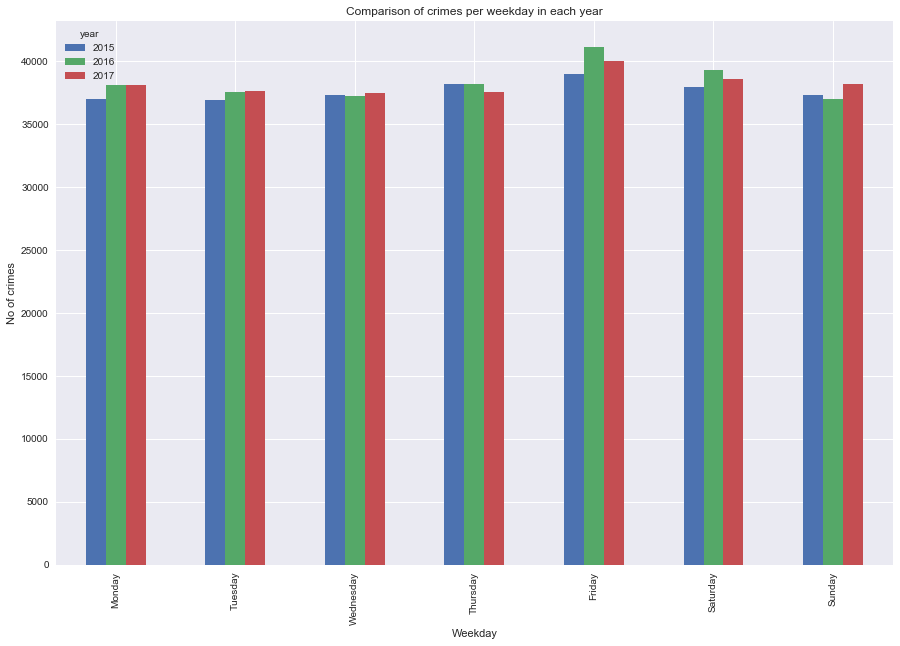

In [58]:
crimedf.groupby(['weekday','year'])['unique_key'].count().unstack().plot(kind='bar', figsize = (15,10))
plt.ylabel('No of crimes')
plt.xlabel('Weekday')
plt.title('Comparison of crimes per weekday in each year')
plt.show()

## Comparison of crimes per month in each year

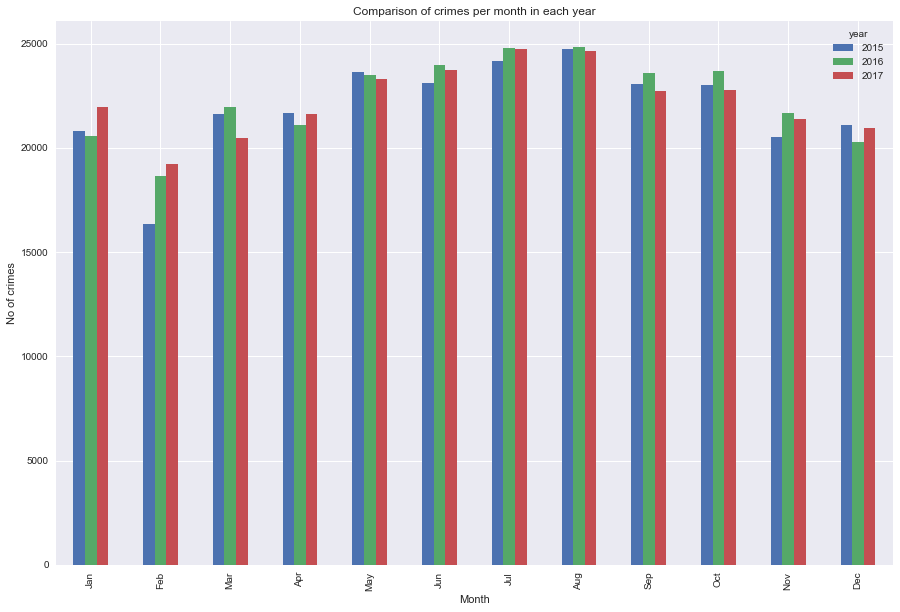

In [59]:
crimedf.groupby(['month','year'])['unique_key'].count().unstack().plot(kind='bar', figsize = (15,10))
plt.ylabel('No of crimes')
plt.xlabel('Month')
plt.title('Comparison of crimes per month in each year')
plt.show()

For 2015 and 2016 the most crimes occured on a Friday and in the month of August. However, for 2017 the most crimes happened in the month of July. However, Friday still remained the day with the most number of crimes

### Was Theft the most common crime in all the three years as well? 

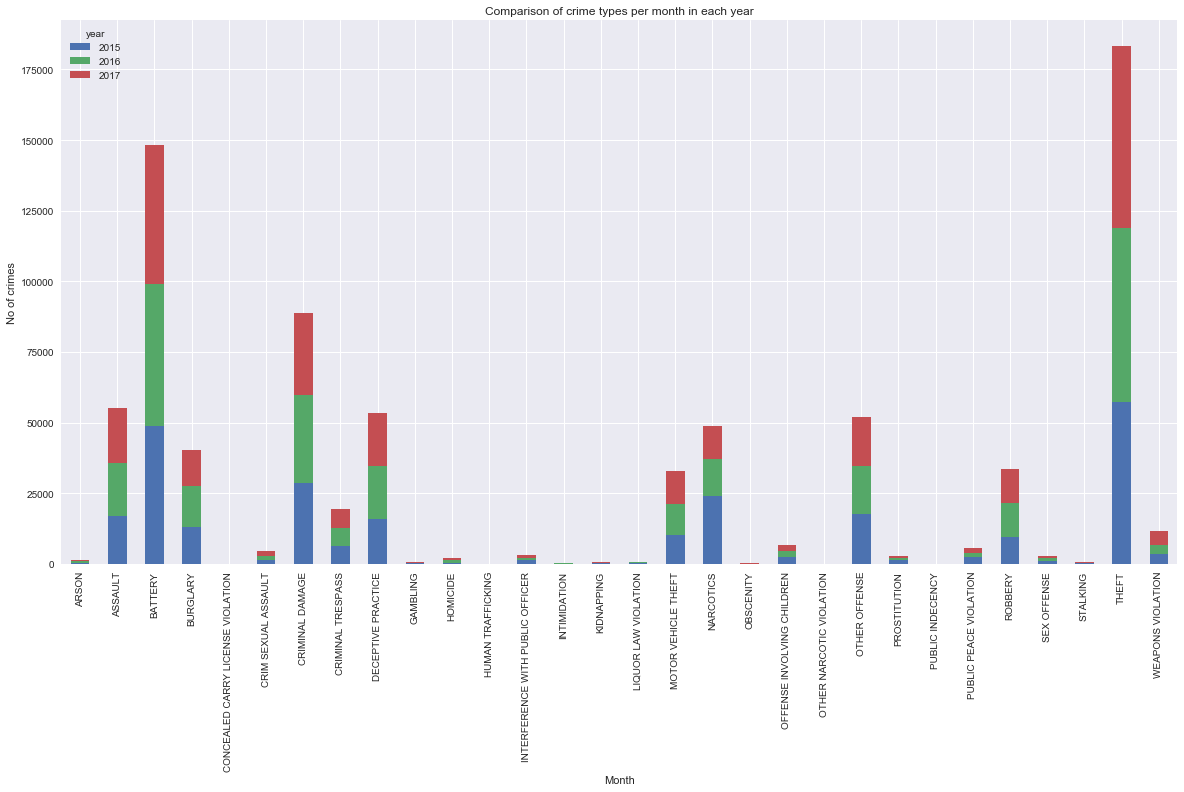

In [60]:
crimedf.groupby(['primary_type','year'])['unique_key'].count().unstack().plot(kind='bar', stacked = True ,figsize = (20,10))
plt.ylabel('No of crimes')
plt.xlabel('Month')
plt.title('Comparison of crime types per month in each year')
plt.show()

We can see that Theft has been the most common crime in all the three years. 